In [619]:
import pyfiles.HFSAnalyzer as HFSAnalyzer
reload(HFSAnalyzer)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
sns.set_style('white')
sns.set_palette('colorblind')
%matplotlib inline

df = HFSAnalyzer.directory_to_df()
df = df.sort_values(by='Nk')

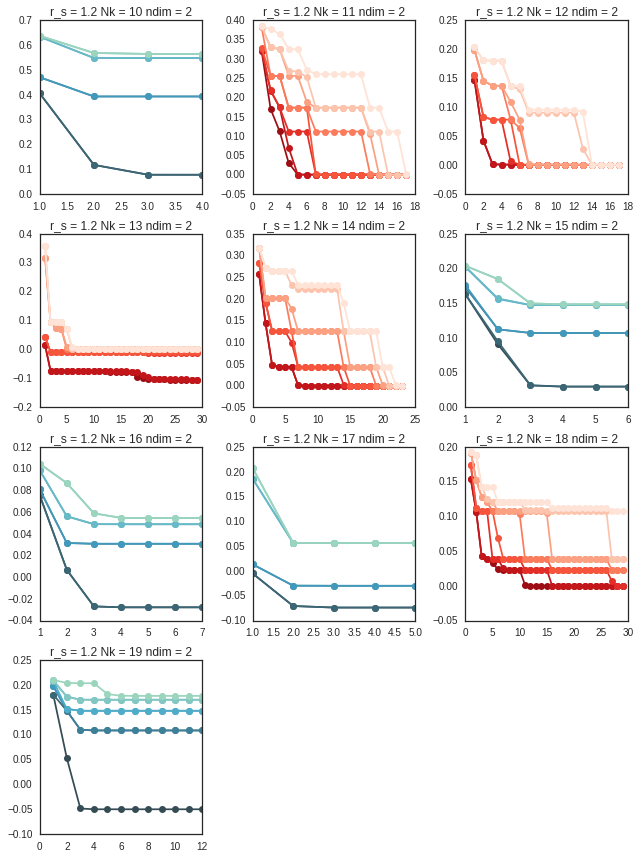

In [620]:
"""
fig = plt.figure()
fig, axes = HFSAnalyzer.df_ApplyAxplotToRows(df, None, HFSAnalyzer.axplot_1stBZ, 
                                             spec_alpha=0.5, scale=1.05, labels=False)

plt.tight_layout()
plt.show()
"""

"""
fig = plt.figure()
fig, axes =  HFSAnalyzer.df_ApplyAxplotToRows(df[:5], None, HFSAnalyzer.axplot_exc_hist)
plt.tight_layout()
plt.show()
"""

fig = plt.figure()
axplot = HFSAnalyzer.axplot_eval_convergence
fig, axes = HFSAnalyzer.df_ApplyAxplotToRows(df, None, axplot)
plt.tight_layout()
plt.show()

10


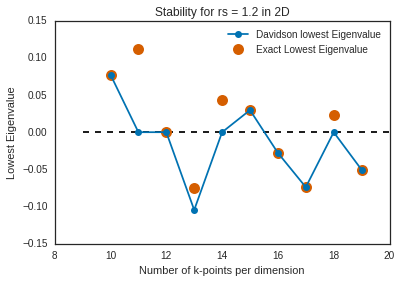

In [621]:
fig = plt.figure()
HFSAnalyzer.plot_dav_vs_full(df)
#plt.gca().set_ylim(-0.1,0.1)
plt.show()

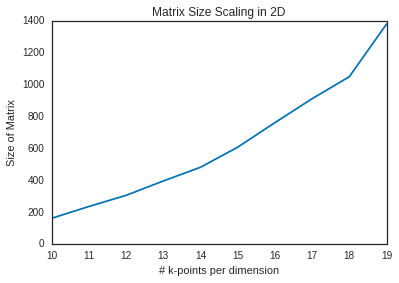

In [622]:
plt.figure()
Nexcs = df.Nexc.as_matrix()
Nks = df.Nk.as_matrix()
plt.plot(Nks, 2*Nexcs)
plt.xlabel('# k-points per dimension')
plt.ylabel('Size of Matrix')
plt.title('Matrix Size Scaling in 2D')
plt.show()

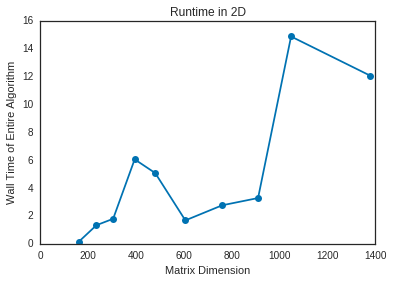

In [623]:
Walltime = [float(s.split()[0]) for s in df['Total Elapsed Time']]
Nexcs = df.Nexc.as_matrix()
plt.title('Runtime in 2D')
plt.xlabel('Matrix Dimension')
plt.ylabel('Wall Time of Entire Algorithm')
plt.plot(2*Nexcs, Walltime, 'o-')

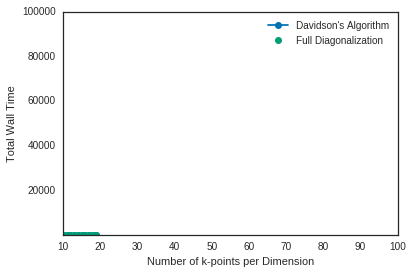

In [624]:
Nks =  df.Nk.as_matrix()
Davtimes =  df.Dav_time.as_matrix()

df_with_fulldiags = df[df['full_diag_min'].notnull()]
fulltimes = df_with_fulldiags.full_diag_time.as_matrix()
Nkfull = df_with_fulldiags.Nk.as_matrix()

c = np.polyfit(Nkfull[-10:], fulltimes[-10:], 3)
cdav = np.polyfit(Nks, Davtimes, 3)

fit = Nks**3 * c[0] + Nks**2 * c[1] + Nks * c[2] + c[3]
davfit = Nks**3 * cdav[0] + Nks**2 * cdav[1] + Nks * cdav[2] + cdav[3]

fig = plt.figure()
plt.plot(Nks, Davtimes, '-o', label="Davidson's Algorithm", c=sns.color_palette()[0])
plt.plot(Nks, davfit, c=sns.color_palette()[0])
plt.plot(Nkfull, fulltimes, 'o', label='Full Diagonalization', c=sns.color_palette()[1])
plt.plot(Nks, fit, c=sns.color_palette()[1])
plt.xlabel('Number of k-points per Dimension')
plt.ylabel('Total Wall Time')
plt.legend(loc='best')
ax = plt.gca()
ax.set_xlim([10,100])
ax.set_ylim([10,100000])
#ax.set_xscale("log")
#ax.set_yscale("log")
plt.xlim = (0, 50)
plt.show()

In [625]:
print c

[  1.53476947e-02  -5.92201860e-01   7.57136333e+00  -3.19370380e+01]


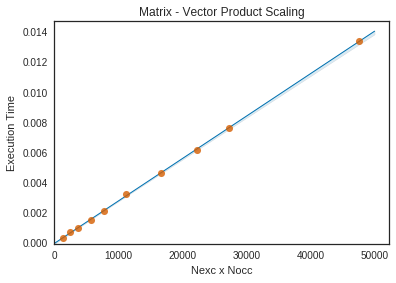

In [626]:
plt.figure()
Nexcs = df['Nexc']
Noccs = df['Nocc']
mvtimes = df['Mv_time']


plt.title('Matrix - Vector Product Scaling')

sns.regplot(Nexcs*Noccs, mvtimes, scatter_kws={'color' : sns.color_palette()[2], 's' : 50, 'zorder' : 2}
                                , line_kws={'zorder' : 1, 'linewidth' : 1})
plt.xlabel('Nexc x Nocc')
plt.ylabel('Execution Time')
ax = plt.gca()
scale = 1.1
ax.set_xlim(0, np.amax(Nexcs * Noccs)*scale)
ax.set_ylim(0, np.amax(mvtimes)*scale)
plt.show()

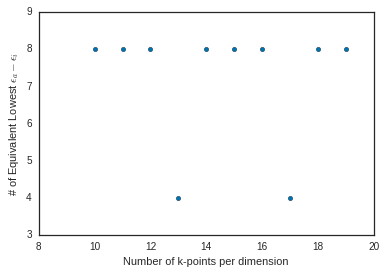

In [627]:
plt.figure()
degen = df['ground_state_degeneracy']
Nks = df.Nk.as_matrix()
plt.scatter(Nks, degen, c=sns.color_palette()[0])
plt.ylabel('# of Equivalent Lowest $\epsilon_a - \epsilon_i$')
plt.xlabel('Number of k-points per dimension')
plt.show()

In [628]:
df['Davidson_Stopping_Criteria']

000001.200_00010_2_3nrjsP                 All Norms in Block Converged
000001.200_00011_2_pDRbZs     All Requested Eigenvalue Norms Converged
000001.200_00012_2_zJGGoF     All Requested Eigenvalue Norms Converged
000001.200_00013_2_CDJ3wV                   Maximum Iterations Reached
000001.200_00014_2_G3CXqv     All Requested Eigenvalue Norms Converged
000001.200_00015_2_cLq5jA                 All Norms in Block Converged
000001.200_00016_2_X8lIhp                 All Norms in Block Converged
000001.200_00017_2_Hk4p0g     All Requested Eigenvalue Norms Converged
000001.200_00018_2_Jp0o1o                   Maximum Iterations Reached
000001.200_00019_2_rCQJFn     All Requested Eigenvalue Norms Converged
Name: Davidson_Stopping_Criteria, dtype: object

In [629]:
import _HFS

mat = np.asfortranarray([[1,1,1], [1,2,1], [3,-1,2], [0,0,0]])
print mat

newvec = np.ones(4)
q, r = np.linalg.qr(mat)
q = np.asfortranarray(q)

_HFS.mod_gram_schmidt(newvec, q)
a = np.hstack([q, newvec.reshape(4,1)])

print newvec
print q
print np.dot(q, q.T) < 1e-8
print a
print np.dot(a, a.T) < 1e-8

[[ 1  1  1]
 [ 1  2  1]
 [ 3 -1  2]
 [ 0  0  0]]
[ -1.11022302e-16  -1.24900090e-16  -1.21430643e-16   1.00000000e+00]
[[-0.30151134 -0.40824829 -0.86164044]
 [-0.30151134 -0.81649658  0.49236596]
 [-0.90453403  0.40824829  0.12309149]
 [-0.         -0.         -0.        ]]
[[False  True  True  True]
 [ True False  True  True]
 [ True  True False  True]
 [ True  True  True  True]]
[[ -3.01511345e-01  -4.08248290e-01  -8.61640437e-01  -1.11022302e-16]
 [ -3.01511345e-01  -8.16496581e-01   4.92365964e-01  -1.24900090e-16]
 [ -9.04534034e-01   4.08248290e-01   1.23091491e-01  -1.21430643e-16]
 [ -0.00000000e+00  -0.00000000e+00  -0.00000000e+00   1.00000000e+00]]
[[False  True  True  True]
 [ True False  True  True]
 [ True  True False  True]
 [ True  True  True False]]
